# Acoustic Fire Extinguisher &mdash; Supervised Learning

## Project Specification

The work to develop is a classification problem related to acoustic fire extinguishers.

It will be supported by machine learning models in order to correctly classify the extinguishing status of fuel flames when subjected to an acoustic fire extinguishers’ sound waves.

Results are to be plotted for ease of visualization and comparison.

All the work developed in this project will be supported by Jupyter notebooks.

## Related work

The dataset for this problem can be found [here](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset)

This dataset’s data card includes several links related to existing work which aims to solve the same problem, some of which are:

- <https://www.sciencedirect.com/science/article/pii/S2214157X21007243> (Open Access)
- <https://www.sciencedirect.com/sdfe/reader/pii/S2214157X21007243/pdf>
- <https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9452168>

## Tools used

- **Pandas**: Tabular data manipulation
- **Scikit-learn/Tensorflow**: AI and machine learning models
- **Matplotlib/Seaborn**: Graphs and data visualization

In addition to this, the following libraries need to be installed to run the code:

- **NumPy**: Numerical computing
- **imbalanced-learn**: for dealing with imbalanced classes and datasets



In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import tensorflow as tf

2023-05-22 01:04:00.131202: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-22 01:04:00.330867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-22 01:04:00.331701: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 01:04:01.520320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data analysis

First we load the dataset and check for missing values.


In [2]:
dataset = pd.read_excel("input/Acoustic_Extinguisher_Fire_Dataset.xlsx")

dataset.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


No missing values were found.\
The dataset is also already balanced, with around 50% of the data being positive and 50% negative.

We then check the data types of each column.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


The fuel column is `object` when it should be `category`, the `size` column is `int64` when it should also be `category`, and the status column should be `bool`.
We will fix these errors and change all `int64` columns to `float64`.
We will also fix a typo in the column names.

In [4]:
dataset.rename(columns={"DESIBEL": "DECIBEL"}, inplace=True)

dataset["FUEL"] = dataset["FUEL"].map({
    "gasoline": 1,
    "kerosene": 2,
    "thinner": 3,
    "lpg": 4,
})

dataset = dataset.astype({
    "SIZE": "category",
    "FUEL": "category",
    "DISTANCE": "float64",
    "DECIBEL": "float64",
    "AIRFLOW": "float64",
    "FREQUENCY": "float64",
    "STATUS": "bool",
})

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SIZE       17442 non-null  category
 1   FUEL       17442 non-null  category
 2   DISTANCE   17442 non-null  float64 
 3   DECIBEL    17442 non-null  float64 
 4   AIRFLOW    17442 non-null  float64 
 5   FREQUENCY  17442 non-null  float64 
 6   STATUS     17442 non-null  bool    
dtypes: bool(1), category(2), float64(4)
memory usage: 596.8 KB


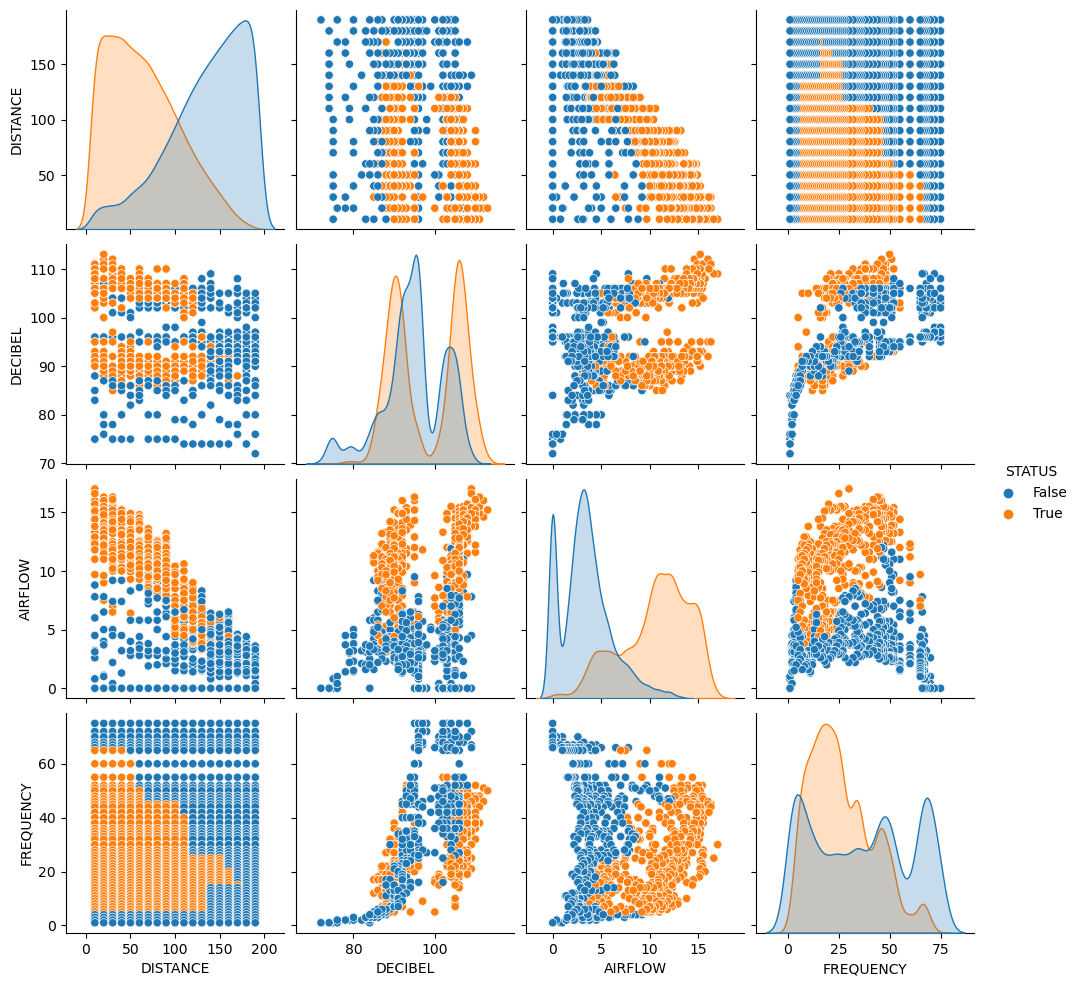

In [5]:
sns.pairplot(dataset, hue="STATUS")

The dataset looks ready to be used, and there aren't any outliers.


## Algorithms


We will use the following algorithms:

- **Decision Tree**
- **Random Forest**
- **K-Nearest Neighbors**
- **Support Vector Machine**
- **Neural Network**


In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

inputs = dataset.drop(["STATUS"], axis=1).values
labels = dataset["STATUS"].values

models = {}

def run_model(name, model, parameters, scale=False, random=False):
    print(f"Running {name} model...")

    if scale:
        model = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model),
        ])
        parameters = {
            f"model__{key}": value
            for key, value in parameters.items()
        }

    grid_search = (
        RandomizedSearchCV(model, parameters, random_state=1, n_jobs=-1, n_iter=50)
        if random else GridSearchCV(model, parameters, cv=10, n_jobs=-1)
    )
    grid_search.fit(inputs, labels)

    models[name] = grid_search
    print(f"Done running {name} model!")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy: {grid_search.best_score_ * 100:.2f}%")

inputs[:5]

array([[  1. ,   1. ,  10. ,  96. ,   0. ,  75. ],
       [  1. ,   1. ,  10. ,  96. ,   0. ,  72. ],
       [  1. ,   1. ,  10. ,  96. ,   2.6,  70. ],
       [  1. ,   1. ,  10. ,  96. ,   3.2,  68. ],
       [  1. ,   1. ,  10. , 109. ,   4.5,  67. ]])

We will run all models with a grid search (or a random grid search to save time) and using 10-fold cross validation, and then compare the results.

In addition, some models will have the data normalized, such as SVM.


### Decision Tree


In [7]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1)

parameters = {
    "max_depth": range(1, 15),
    "max_features": range(1, 7),
}

run_model("Decision Tree", decision_tree, parameters)


Running Decision Tree model...
Done running Decision Tree model!
Best parameters: {'max_depth': 7, 'max_features': 3}
Accuracy: 87.16%


### Random Forest


In [8]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=1, warm_start=True)

parameters = {
    "max_depth": range(5, 15),
    "max_features": range(1, 7),
}

run_model("Random Forest", random_forest, parameters)


Running Random Forest model...
Done running Random Forest model!
Best parameters: {'max_depth': 7, 'max_features': 3}
Accuracy: 89.40%


### Naive Bayes


In [9]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()

parameters = {}

run_model("Gaussian Naive Bayes", gaussian_nb, parameters)


Running Gaussian Naive Bayes model...
Done running Gaussian Naive Bayes model!
Best parameters: {}
Accuracy: 86.99%


### K-Nearest Neighbors


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters = {
    "n_neighbors": range(1, 15),
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
}

run_model("K-Nearest Neighbors", knn, parameters)


Running K-Nearest Neighbors model...
Done running K-Nearest Neighbors model!
Best parameters: {'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 92.06%


### Support Vector Machine


In [11]:
from sklearn.svm import SVC

svc = SVC(random_state=1)

parameters = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": range(1, 6),
    "decision_function_shape": ["ovo", "ovr"],
}

run_model("Support Vector Machine", svc, parameters, scale=True, random=True)


Running Support Vector Machine model...
Done running Support Vector Machine model!
Best parameters: {'model__kernel': 'rbf', 'model__degree': 4, 'model__decision_function_shape': 'ovo', 'model__C': 0.1}
Accuracy: 89.01%


### Neural Network


In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, warm_start=True, early_stopping=True)

parameters = {
    "hidden_layer_sizes": [(10,), (50,), (10, 10), (50, 50)],
    "activation": ["logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1],
}

run_model("Multi-Layer Perceptron", mlp, parameters, scale=True, random=True)


Running Multi-Layer Perceptron model...


/home/toino/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/toino/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/toino/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

Done running Multi-Layer Perceptron model!
Best parameters: {'model__solver': 'adam', 'model__hidden_layer_sizes': (10, 10), 'model__alpha': 0.0001, 'model__activation': 'relu'}
Accuracy: 89.18%


## Results


The best model was KNN, with an accuracy of 92%, with most other models around 89 to 90%, except for the simplest models, Decision Tree and Naive Bayes, which had an accuracy of 87%.

Such high accuracy is probably due to the fact that the dataset is already balanced, and the fact that the data was already very well collected and prepared.


[Text(0, 0, 'Decision Tree'),
 Text(1, 0, 'Random Forest'),
 Text(2, 0, 'Gaussian Naive Bayes'),
 Text(3, 0, 'K-Nearest Neighbors'),
 Text(4, 0, 'Support Vector Machine'),
 Text(5, 0, 'Multi-Layer Perceptron')]

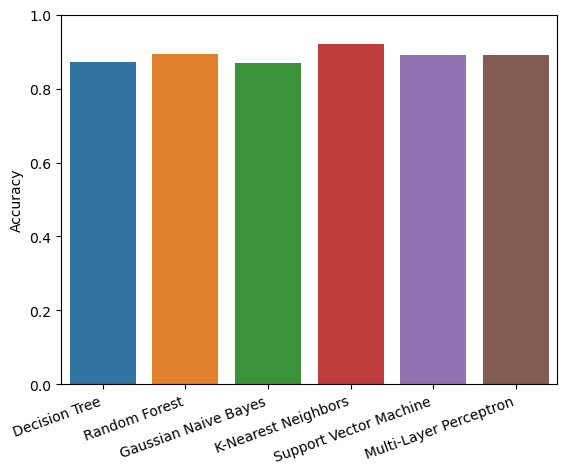

In [13]:
plot = sns.barplot(
    x=list(models.keys()),
    y=[model.best_score_ for model in models.values()],
)
plot.set_ylim(0, 1.0)
plot.set_ylabel("Accuracy")
plot.set_xticklabels(plot.get_xticklabels(), rotation=20, horizontalalignment="right")
